In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#make new ph dataset without initial nan values
dictph = {'Time': times[117:], 'ph':phs[117:]}
dfph2 = pd.DataFrame(dictph)
dfphf = dfph2.interpolate()
ph_test = dfphf['ph'].tolist() 
time_test = dfphf['Time'].tolist()

In [4]:
#make a separate ph and matching time lists because ph is missing values
dfph1={'Time': times, 'ph': phs} #make dictionary of time and ph
dfph = pd.DataFrame(dfph1) #make dataframe
dfph.dropna(inplace=True) #remove rows with NaN values
#write the ph and times to lists with no NaN values
phs2 = dfph['ph'].tolist() 
timeph = dfph['Time'].tolist()

In [5]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [6]:
#convert data to np arrays to use polyfit
times_np = np.array(times)
timeph_np = np.array(timeph)
time_test_np = np.array(time_test)
co2_np = np.array(co2s)
temp_np = np.array(temps)
sea_ice_ext_np = np.array(sea_ice_exts)
pH_np = np.array(phs2)
ph_np = np.array(ph_test)

In [7]:
#normalize the datasets to compare the trends
co2_max = max(co2_np)
co2n_np = (co2_np)/co2_max

temp_max = max(temp_np)
tempn_np = (temp_np)/temp_max

ice_max = max(sea_ice_ext_np)
icen_np = (sea_ice_ext_np)/ice_max

ph_max = max(pH_np)
phn_np = (pH_np)/ph_max

ph_max_2 = max(ph_np)
phn_2_np = (ph_np)/ph_max_2

In [8]:
a, b = np.polyfit(times_np, co2n_np, 1)
a2, b2 = np.polyfit(times_np[-180:],co2n_np[-180:], 1)
a3, b3 = np.polyfit(times_np[:180],co2n_np[:180], 1)
#plt.plot(times,co2n_np)
#plt.plot(times,a*times_np+b)
#plt.plot(times[-180:],a2*times_np[-180:]+b2,color='k')

In [9]:
a_temp, b_temp = np.polyfit(times_np, tempn_np, 1)
a2_temp, b2_temp = np.polyfit(times_np[-180:],tempn_np[-180:], 1)
a3_temp, b3_temp = np.polyfit(times_np[:180],tempn_np[:180], 1)
#plt.plot(times,tempn_np)
#plt.plot(times,a_temp*times_np+b_temp)
#plt.plot(times[-180:],a2_temp*times_np[-180:]+b2_temp,color='k')

In [10]:
a_ice, b_ice = np.polyfit(times_np, icen_np, 1)
a2_ice, b2_ice = np.polyfit(times_np[340:-12],icen_np[340:-12], 1)
a3_ice, b3_ice = np.polyfit(times_np[:180],icen_np[:180], 1)
#plt.plot(times,icen_np)
#plt.plot(times,a_ice*times_np+b_ice)
#plt.plot(times[340:-12],a2_ice*times_np[340:-12]+b2_ice,color='k')

In [11]:
a_ph, b_ph = np.polyfit(timeph_np, phn_np, 1)
a2_ph, b2_ph = np.polyfit(timeph_np[-120:],phn_np[-120:], 1)
a3_ph, b3_ph = np.polyfit(timeph_np[:120],phn_np[:120], 1)
#plt.plot(timeph,phn_np)
#plt.plot(timeph,a_ph*timeph_np+b_ph)
#plt.plot(timeph[-120:],a2_ph*timeph_np[-120:]+b2_ph,color='k')

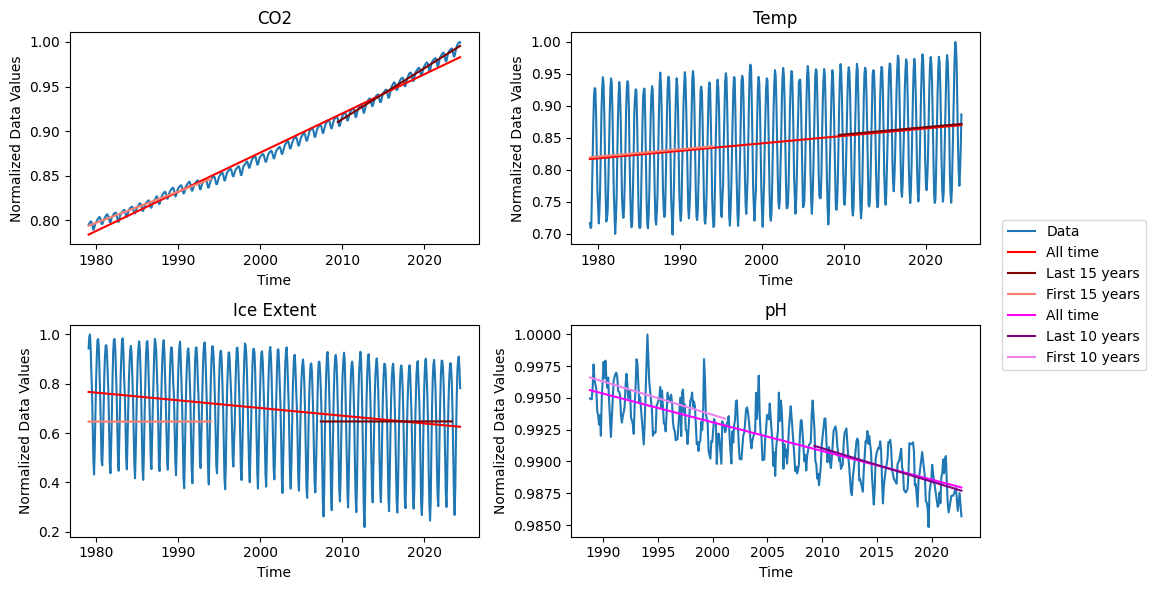

<Figure size 2000x1200 with 0 Axes>

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times,co2n_np, label = 'Data')
axs[0, 0].plot(times,a*times_np+b, color='red', label='All time')
axs[0, 0].plot(times[-180:],a2*times_np[-180:]+b2,color='maroon', label = 'Last 15 years')
axs[0, 0].plot(times[:180],a3*times_np[:180]+b3,color='salmon', label = 'First 15 years')
axs[0, 0].set_title('CO2')
#axs[0, 0].legend()

axs[0, 1].plot(times,tempn_np)
axs[0, 1].plot(times,a_temp*times_np+b_temp, color='red')
axs[0, 1].plot(times[-180:],a2_temp*times_np[-180:]+b2_temp,color='maroon')
axs[0, 1].plot(times[:180],a2_temp*times_np[:180]+b2_temp,color='salmon')
axs[0, 1].set_title('Temp')

axs[1, 0].plot(times,icen_np)
axs[1, 0].plot(times,a_ice*times_np+b_ice, color='red')
axs[1, 0].plot(times[340:-12],a2_ice*times_np[340:-12]+b2_ice,color='maroon')
axs[1, 0].plot(times[:180],a2_ice*times_np[:180]+b2_ice,color='salmon')
axs[1, 0].set_title('Ice Extent')

axs[1, 1].plot(timeph,phn_np)
axs[1, 1].plot(timeph,a_ph*timeph_np+b_ph, color='magenta', label='All time')
axs[1, 1].plot(timeph[-120:],a2_ph*timeph_np[-120:]+b2_ph,color='purple', label = 'Last 10 years')
axs[1, 1].plot(timeph[:120],a2_ph*timeph_np[:120]+b2_ph,color='violet', label = 'First 10 years')
axs[1, 1].set_title('pH')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Normalized Data Values')

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.savefig('images/trends.pdf', dpi=300, bbox_inches='tight')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [13]:
slopes = []
slopes.append(a)
slopes.append(a2)
slopes.append(a3)
slopes.append(a_temp)
slopes.append(a2_temp)
slopes.append(a3_temp)
slopes.append(a_ice)
slopes.append(a2_ice)
slopes.append(a3_ice)
slopes.append(a_ph)
slopes.append(a2_ph)
slopes.append(a3_ph)
slopes

[np.float64(0.004391977270895819),
 np.float64(0.0057195701272349094),
 np.float64(0.003510842825486896),
 np.float64(0.001171106334096468),
 np.float64(0.0011520554958295791),
 np.float64(0.0010815437792660212),
 np.float64(-0.0031241517610361234),
 np.float64(1.4398862971857097e-05),
 np.float64(-0.003927324593573577),
 np.float64(-0.00022588152462218032),
 np.float64(-0.0002628570921851526),
 np.float64(-0.00028576157908246497)]

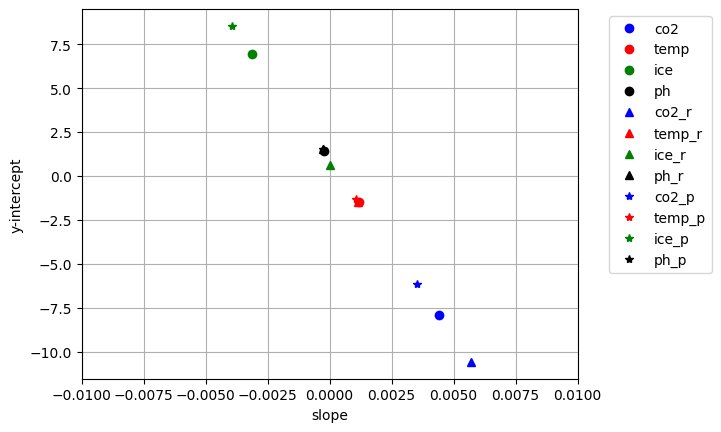

In [14]:
plt.plot(a,b,'o',color='b',label='co2')
plt.plot(a_temp,b_temp,'o',color='r',label='temp')
plt.plot(a_ice,b_ice,'o',color='g',label='ice')
plt.plot(a_ph,b_ph,'o',color='k',label='ph')

plt.plot(a2,b2,'^',color='b',label='co2_r')
plt.plot(a2_temp,b2_temp,'^',color='r',label='temp_r')
plt.plot(a2_ice,b2_ice,'^',color='g',label='ice_r')
plt.plot(a2_ph,b2_ph,'^',color='k',label='ph_r')

plt.plot(a3,b3,'*',color='b',label='co2_p')
plt.plot(a3_temp,b3_temp,'*',color='r',label='temp_p')
plt.plot(a3_ice,b3_ice,'*',color='g',label='ice_p')
plt.plot(a3_ph,b3_ph,'*',color='k',label='ph_p')

plt.xlabel('slope')
plt.ylabel('y-intercept')
plt.xlim(-0.01,0.01)
#plt.ylim(-12,12)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')